<a href="https://colab.research.google.com/github/shrinivas-169/shri/blob/main/Shri_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PART-A
Importing Libraries,Uploading and displaying Dataset,Defining Target and Feature Variable


In [ ]:
#import liabraries
import pandas as pd
import numpy as np
import seaborn as sns

#uploading csv file
from google.colab import files
uploaded=files.upload()

#displaying dataset
df=pd.read_csv("Wholesale customers data.csv")
df.head()

# Target variable
y = df['Channel']

# Feature variables
X = df.drop('Channel', axis=1)

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())



Saving Wholesale customers data.csv to Wholesale customers data (2).csv
Features (X):
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0       3  12669  9656     7561     214              2674        1338
1       3   7057  9810     9568    1762              3293        1776
2       3   6353  8808     7684    2405              3516        7844
3       3  13265  1196     4221    6404               507        1788
4       3  22615  5410     7198    3915              1777        5185

Target (y):
0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64


In [ ]:
#Step 4:Outlier Detection
# Calculate IQR
Q1 = df['Channel'].quantile(0.25)
Q3 = df['Channel'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

print("original data shape",df.shape)
print("After outlier removal:", df_cleaned.shape)


original data shape (440, 11)
After outlier removal: (0, 11)


# PART-B
Datapreprocessing and Feature Engineeering

Number of outliers: 29


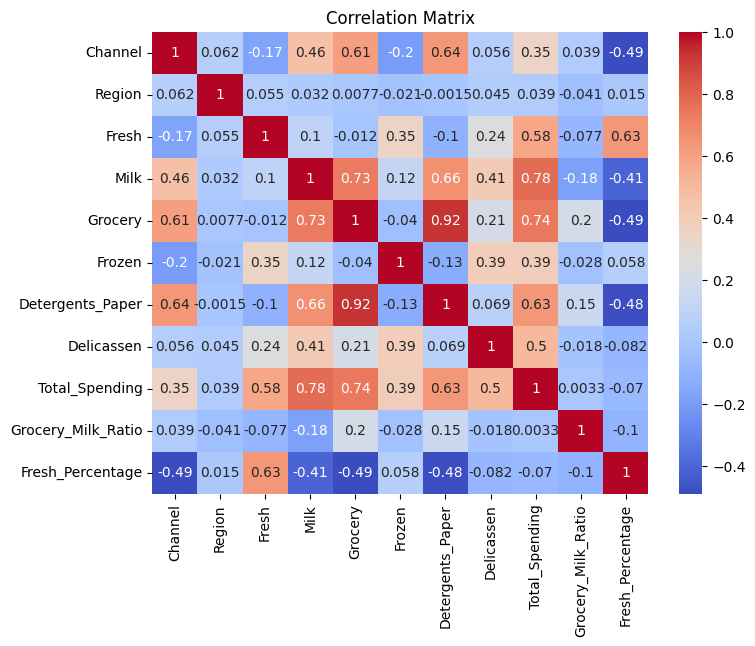

               Feature       VIF
0              Channel  9.879132
1               Region  9.044560
2                Fresh       inf
3                 Milk       inf
4              Grocery       inf
5               Frozen       inf
6     Detergents_Paper       inf
7           Delicassen       inf
8       Total_Spending       inf
9   Grocery_Milk_Ratio  2.577741
10    Fresh_Percentage  7.510248


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
#Step 1:-Import libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor


#Step 2:Load Dataset
df = pd.read_csv("Wholesale customers data.csv")
df.head()



#Step 3:Feature Engineering

# 1. Total annual spending
df['Total_Spending'] = (
    df['Fresh'] + df['Milk'] + df['Grocery'] +
    df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
)

# 2. Grocery to Milk ratio
df['Grocery_Milk_Ratio'] = df['Grocery'] / (df['Milk'] + 1)

# 3. Fresh spending percentage
df['Fresh_Percentage'] = df['Fresh'] / df['Total_Spending']



#Step 4:Outlier Detection
numerical_cols = [
    'Channel','Region',
    'Fresh','Milk','Grocery','Frozen',
    'Detergents_Paper','Delicassen','Total_Spending','Grocery_Milk_Ratio','Fresh_Percentage'
]

z_scores = np.abs(zscore(df[numerical_cols]))
outliers = (z_scores > 3).any(axis=1)

print("Number of outliers:", outliers.sum())

# Remove outliers
df_cleaned = df[~outliers]



#Step:5 Scaling of Numerical Feature

scaler = StandardScaler()

scaled_features = scaler.fit_transform(
    df_cleaned[numerical_cols]
)

df_scaled = pd.DataFrame(
    scaled_features,
    columns=numerical_cols,
    index=df_cleaned.index
)

#Multicollinearity
#(A)Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


#(B) VIF(Varience Inflation Factor)

X = df[numerical_cols]

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print(vif_data)

# PART-C


In [ ]:
#Step 1:-Import libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



#Step 2:Load Dataset
df = pd.read_csv("Wholesale customers data.csv")
df.head()

# 1. Total annual spending
df['Total_Spending'] = (
    df['Fresh'] + df['Milk'] + df['Grocery'] +
    df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
)
df[['Total_Spending']].head()

#Build Regression model(feature and target)
x=df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y=df[['Total_Spending']]


#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

#
y_pred=model.predict(x_test)
r2  = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae  = mean_absolute_error(y_test,y_pred)

n=x_test.shape[0]
p=x_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("R2 Score:",r2)
print("RMSE:",rmse)
print("MAE:",mae)

#Apply Ridge and Lasso Regression

from sklearn.linear_model import Ridge, Lasso

#Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)
print("Ridge Regression:",r2_score(y_test, y_pred_ridge))

#Lasso Regression

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)
print("Lasso Regression:",r2_score(y_test, y_pred_lasso))



R2 Score: 1.0
RMSE: 1.6689979665121048e-11
MAE: 1.1466867859284816e-11
Ridge Regression: 1.0
Lasso Regression: 0.9999999972239244


# PART-D
Classification Modeling



In [ ]:
#Step 11:Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)



#Step 12:LoadDataset & Prepare Data

df = pd.read_csv("Wholesale customers data.csv")

X = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
        'Detergents_Paper', 'Delicassen']]
y = df['Channel']

# Scaling (important for Logistic & SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



#Step 13:Train Classification

#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)



#Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)



#Step 14: Model Evaluation

def evaluate_model(name, model, y_test, y_pred, X_test):
    print(name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("-"*30)

evaluate_model("Logistic Regression", lr, y_test, y_pred_lr, X_test)
evaluate_model("SVM", svm, y_test, y_pred_svm, X_test)
evaluate_model("Decision Tree", dt, y_test, y_pred_dt, X_test)
evaluate_model("Random Forest", rf, y_test, y_pred_rf, X_test)
evaluate_model("Gradient Boosting", gb, y_test, y_pred_gb, X_test)

Logistic Regression
Accuracy : 0.9204545454545454
Precision: 0.953125
Recall   : 0.9384615384615385
F1 Score : 0.9457364341085271
ROC-AUC  : 0.9551839464882943
------------------------------
SVM
Accuracy : 0.9204545454545454
Precision: 0.967741935483871
Recall   : 0.9230769230769231
F1 Score : 0.9448818897637795
ROC-AUC  : 0.9719063545150501
------------------------------
Decision Tree
Accuracy : 0.8863636363636364
Precision: 0.9508196721311475
Recall   : 0.8923076923076924
F1 Score : 0.9206349206349206
ROC-AUC  : 0.8809364548494982
------------------------------
Random Forest
Accuracy : 0.9090909090909091
Precision: 0.9672131147540983
Recall   : 0.9076923076923077
F1 Score : 0.9365079365079365
ROC-AUC  : 0.960200668896321
------------------------------
Gradient Boosting
Accuracy : 0.8977272727272727
Precision: 0.9516129032258065
Recall   : 0.9076923076923077
F1 Score : 0.9291338582677166
ROC-AUC  : 0.9551839464882943
------------------------------


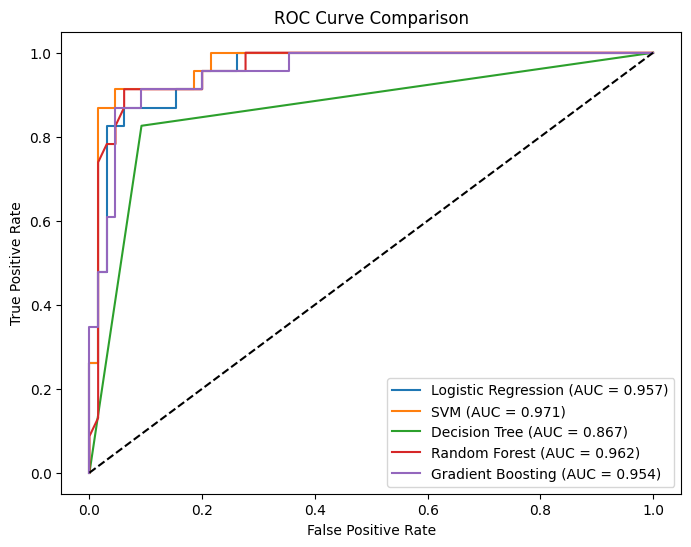

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load dataset
df = pd.read_csv("Wholesale customers data.csv")

# Convert Channel to binary (IMPORTANT)
df['Channel'] = df['Channel'].map({1: 0, 2: 1})

# Features and target
X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y = df['Channel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Plot ROC curves
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Diagonal line
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# PART-E
Unsupervised Learning


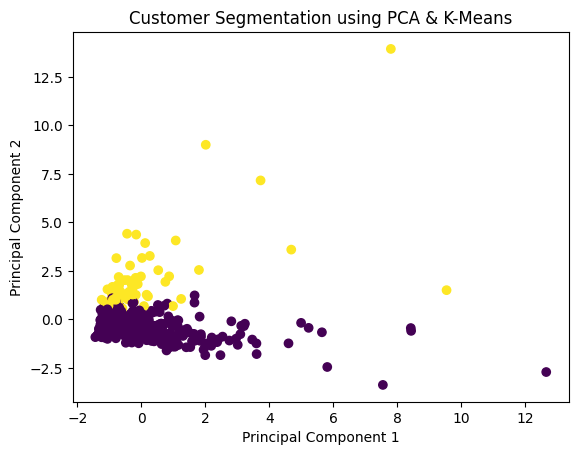

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df[['Fresh', 'Milk', 'Grocery', 'Cluster']].head()




from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA & K-Means")
plt.show()

#**PART-F**
****

**Explain:-**

**Overfitting vs Underfitting:-**

**Overfitting**

The model learns the training data too well, including random noice and outliers, essentially memorizing it.

**Performance** Excellent on training data,but poor on new,unseen data.

****

**Underfitting**


The model is too simple to capture the underlying patterns or structure in the data.

**Performance** Poor on both training and test data

****
****

**Train vs Validation behavior:-**


**Train:-**

Used to directly tech the algorithm by identify relationships and structures within the data.

**Validation:-**

Acts as a frequent checkpoint during development to optimize hyperparameters nad detect overfitting early.
****
****

**Importance of Handling Class Imbalance:-**

 Ie ensures the model doesn't becomes biases towards the majority group

 ****